<a href="https://colab.research.google.com/github/FemiAdesola/Data-Science/blob/main/Public_Relations_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <ins>**THE DATA SCIENCE FOR BUSINESS**


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=11BquVVgQTebvVO5NZ2TGA526rulbWBv5"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Analyzing Customer Sentiment
  </td></tr>
</table>


# <ins>**Public Relation Department**
+ <ins>**Natural language processing**</ins> can be used to build predictive models to perform sentiment analysis on social media posts and reviews and predict if customers are happy or not.
+ **Natural language processors** work by converting words into numbers and training a machine learning models to make predictions.
+ That way, you can automatically know if your customers are happy or not without manually going through massive number of tweets or reviews!

## <ins>**Case study**
+ The work as a data scientist at a multinational corporation.
+ The Public relations department team has collected extensive data on their customers such as product reviews.
+ Based on the reviews ( in text format), the team would like to predict whether their customers are satisfied with the product or not.

# <ins>**IMPORT LIBRARIES AND DATASETS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#  To mount the drive using the following commands:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
reviews_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/amazon-alexa.tsv', sep = '\t')

In [4]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


For the **feedback**, it's one if the ratings are either four or five and it will be zero, if the ratings are basically below that are either ones or two stars. Whoever inserts 1 or 2 starts, the feedback will be 0, which means the sentiment is negative.

In [5]:
reviews_df.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
# For seeing the reviews
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# <ins>**EXPLORE DATASET**

## For seeing if there are missing data or not.

<Axes: >

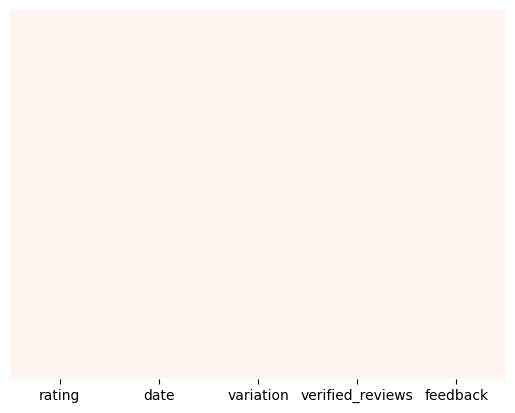

In [9]:
sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap="Reds")

## For plotting histogram of our data

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

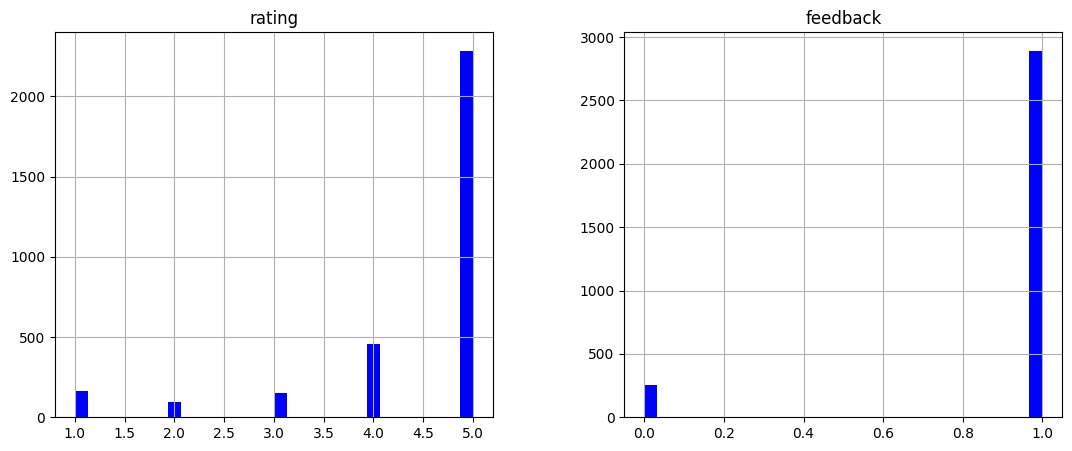

In [10]:
reviews_df.hist(bins = 30, figsize = (13,5), color = 'b')

## For checking how many word characters each review has

In [11]:
# Let's get the length of the messages and for adding another columns call length
reviews_df['length'] = reviews_df['verified_reviews'].str.len()

In [12]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13.0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9.0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195.0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172.0
4,5,31-Jul-18,Charcoal Fabric,Music,1,5.0


## For plotting histogram for length review character

<Axes: ylabel='Frequency'>

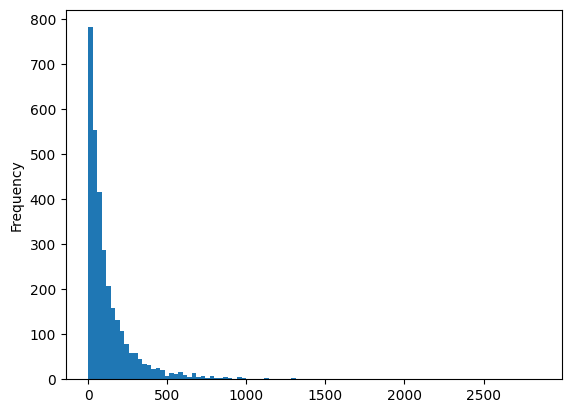

In [13]:
reviews_df['length'].plot(bins=100, kind='hist')

## For seeing longest and shortest message

In [14]:
reviews_df.length.describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [15]:
# For seeing the longest
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [16]:
# For seeing the shortest
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [17]:
# For seeing the average (mean)
reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [18]:
# For seeing the average (mean)
reviews_df[reviews_df['length'] == 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

## For getting the positive reviews on their own and the negative reviews on their own.

In [19]:
positive = reviews_df[reviews_df['feedback']==1]

In [20]:
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13.0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9.0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195.0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172.0
4,5,31-Jul-18,Charcoal Fabric,Music,1,5.0
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50.0
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135.0
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441.0
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380.0


In [21]:
negative = reviews_df[reviews_df['feedback']==0]

In [22]:
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163.0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53.0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18.0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87.0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20.0
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120.0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37.0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240.0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17.0


<Axes: xlabel='feedback', ylabel='count'>

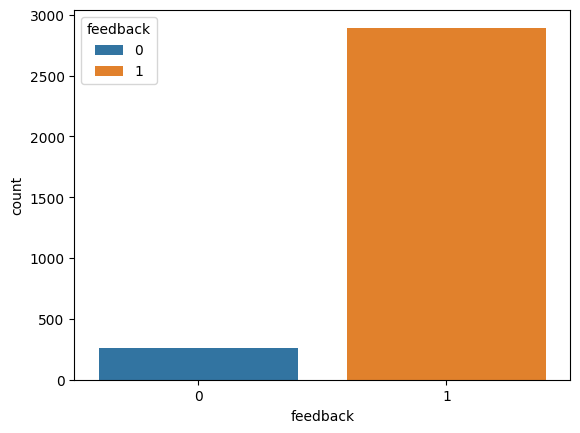

In [23]:
sns.countplot(x = 'feedback', hue='feedback', data = reviews_df)

Here we have two hundred and fifty seven rows that are negative and we have around twenty nine hundred that are positive

<Axes: xlabel='rating', ylabel='count'>

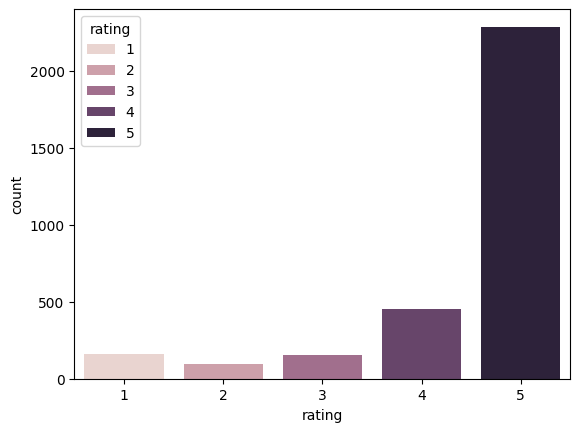

In [24]:
# For rating
sns.countplot(x = 'rating', hue = 'rating', data = reviews_df)

<Axes: >

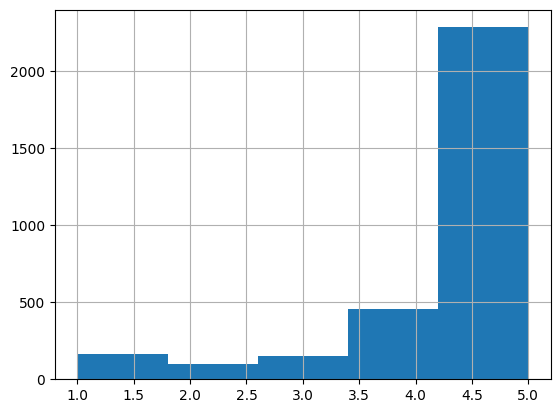

In [25]:
# For plotting histogram for rating
reviews_df['rating'].hist(bins = 5)

## To see if there is a relationship between the variation and maybe my feedback or my ratings.

<Axes: xlabel='variation', ylabel='rating'>

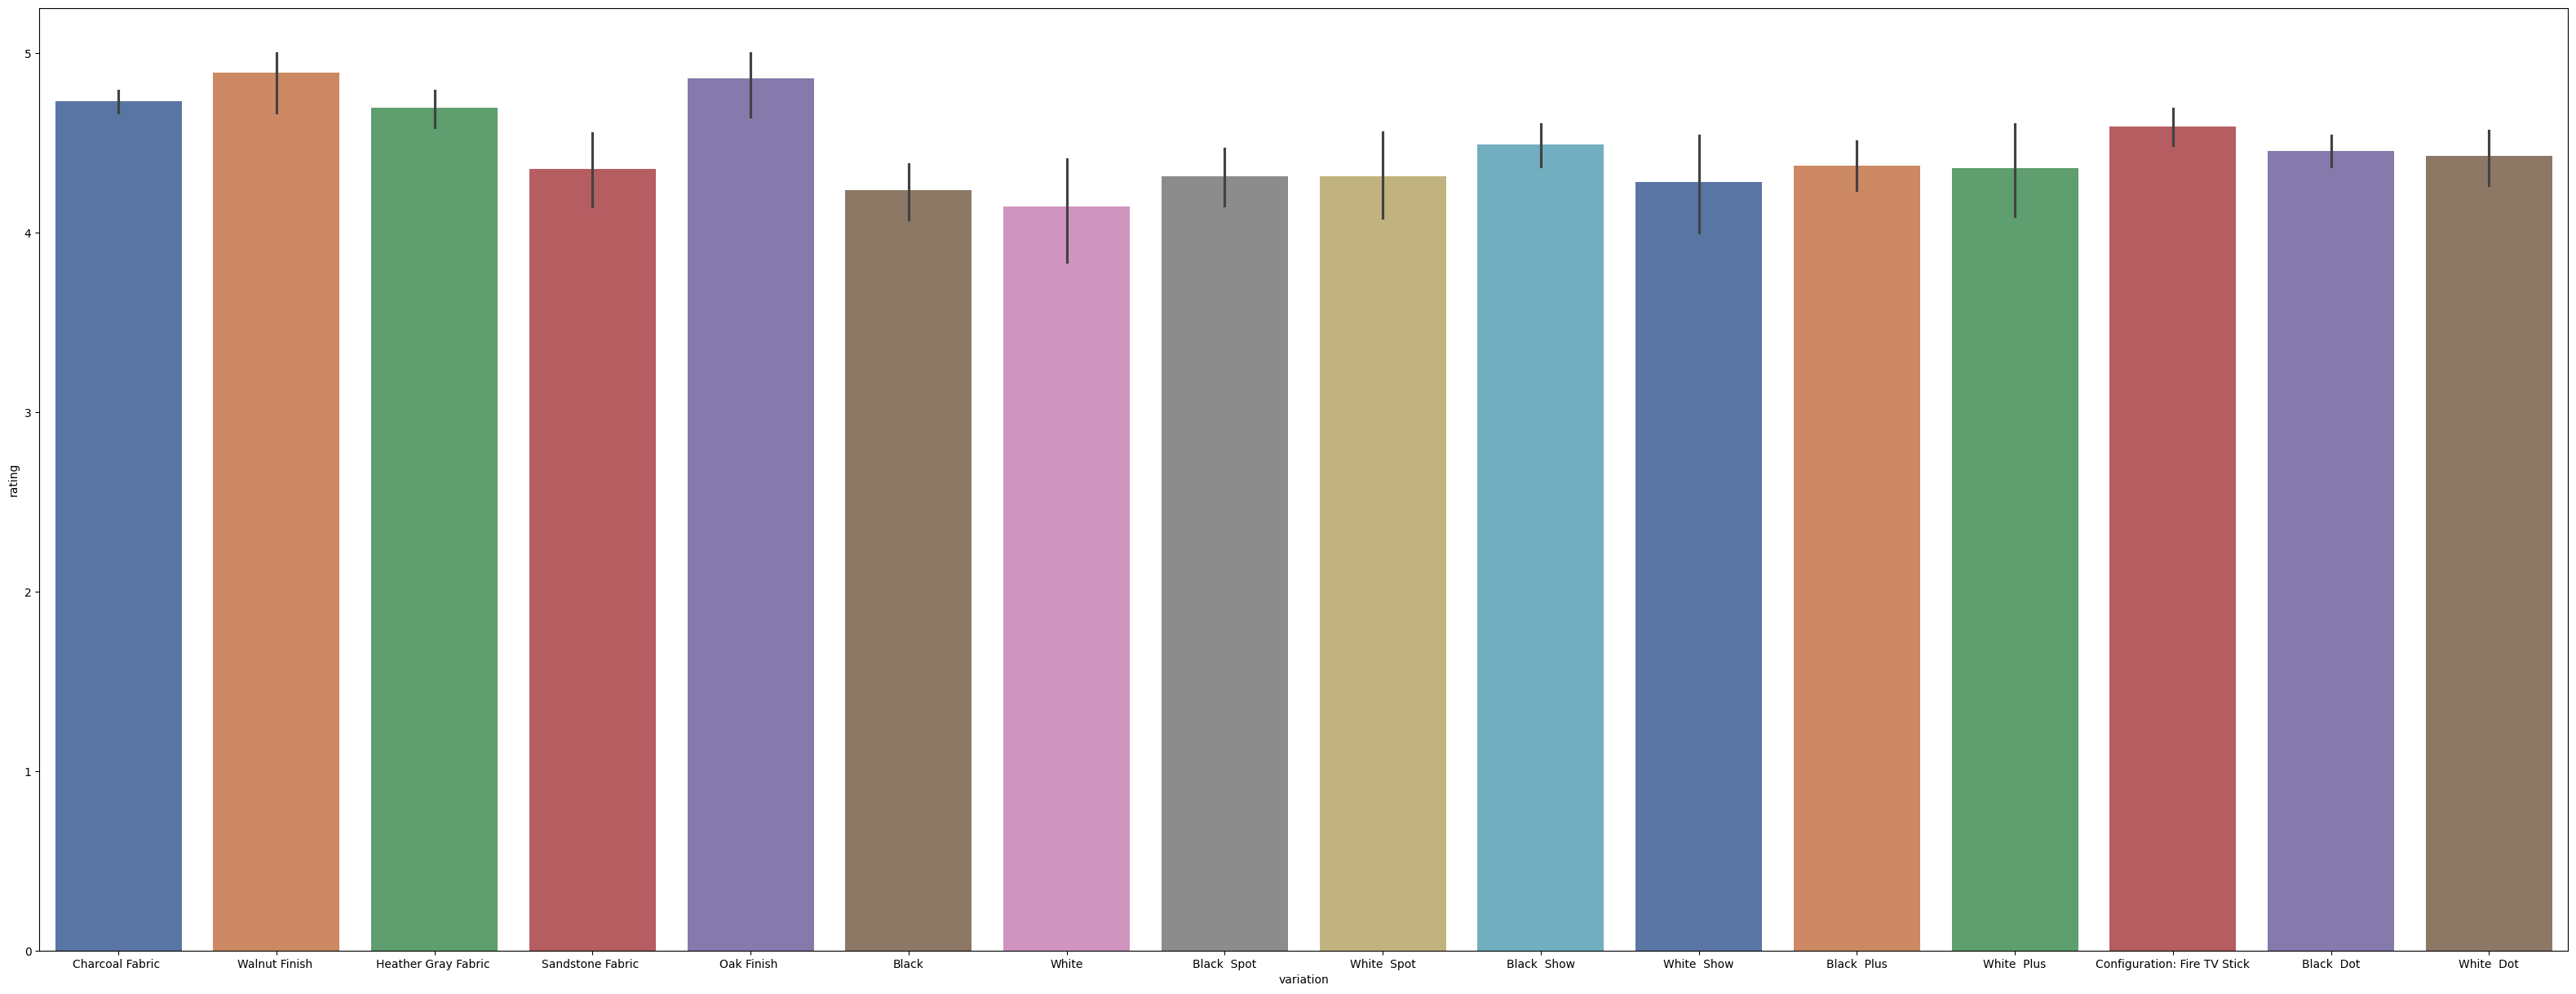

In [26]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', hue = 'variation', y='rating', data = reviews_df, palette = 'deep')

## <ins>**To plot or draw what we call word clouds**
+ To visually see what are the most prominent words.
+ what are the most prominent and most famous words that the users are using.
+ This is actually extremely important kind of way visualizing.

In [27]:
# For making massive paragraph or sentences
sentences = reviews_df['verified_reviews'].tolist()

In [28]:
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [29]:
len(sentences)


3150

### **For joining all the sentences**

In [30]:
sentences_as_one_string = " ".join(map(str, sentences))

In [31]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

## **For Plotting word clouds**

In [32]:
from wordcloud import WordCloud

### **For the positive data frame**

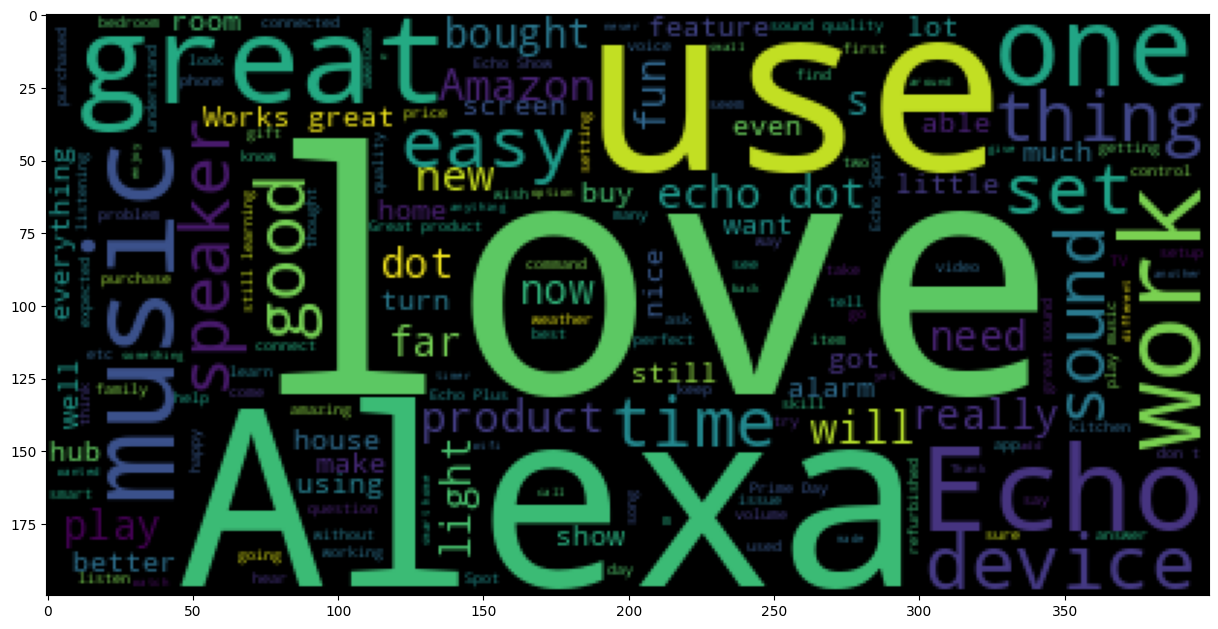

In [33]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_as_one_string))

### **For the Negative data frame**

In [34]:
negative_list = negative['verified_reviews'].tolist()

In [35]:
negative_list

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

In [36]:
negative_sentences_as_one_string = " ".join(map(str,negative_list))

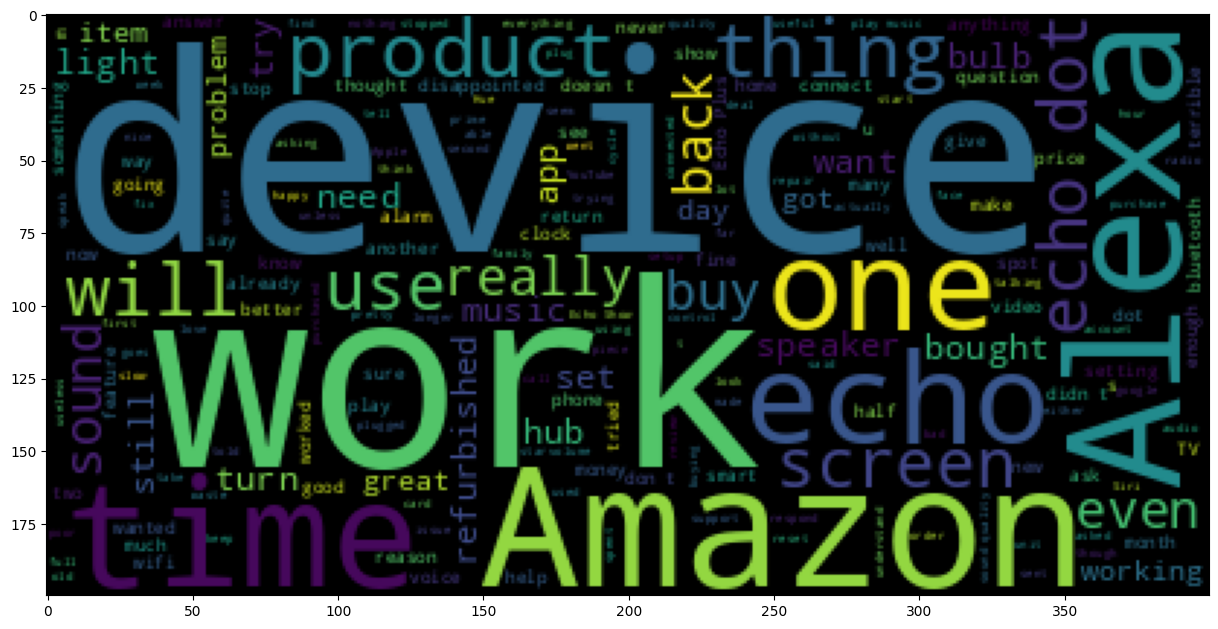

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# <ins>**PERFORM DATA CLEANING**

In [38]:
# For droping unnecessary data such as  the date, rating and length
reviews_df = reviews_df.drop(['date', 'rating', 'length'],axis=1)

In [39]:
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [40]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   variation         3150 non-null   object
 1   verified_reviews  3149 non-null   object
 2   feedback          3150 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 74.0+ KB


We added **drop_first true** in order to avoid a dummy variable trap which occurs when we have two columns and one column can be predicted from the other ones

In [41]:
# For converting variation to 0s = false and 1s = True
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True)

In [42]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [43]:
# For drop the variation column
reviews_df.drop(['variation'], axis=1, inplace=True)

In [44]:
# Now let's add the encoded column (variation_dummies) again
reviews_df = pd.concat([reviews_df,variation_dummies], axis=1)

In [45]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,"Listening to music, searching locations, check...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,"I do love these things, i have them running my...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,Only complaint I have is that the sound qualit...,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


# <ins>**LEARN HOW TO REMOVE PUNCTUATION FROM TEXT**

**For import string**

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
Words = 'Hello Dr. Future, I am so happy to be learning ML now!!'

In [48]:
# For remove punctuation from the words
Test_punc_removed = [char for char in Words if char not in string.punctuation]

In [49]:
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'D',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'L',
 ' ',
 'n',
 'o',
 'w']

In [50]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Dr Future I am so happy to be learning ML now'

# <ins>**UNDERSTAND HOW TO REMOVE STOPWORDS**

**Import nltk = natural language tool kit**

In [51]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
Test_punc_removed_join

'Hello Dr Future I am so happy to be learning ML now'

In [54]:
# For removing stopwords and split them
# For covering all words to lower case ( word.lower())
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [55]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Hello', 'Dr', 'Future', 'happy', 'learning', 'ML']

In [56]:
word_challenge = 'Here is a word challenge, that will teach you how to remove stopwords and punctuations!'

In [57]:
challege = [ char for char in word_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ]

In [58]:
challenge

['word', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

In [59]:
challenge_sentences_as_one_string = " ".join(map(str,challenge))

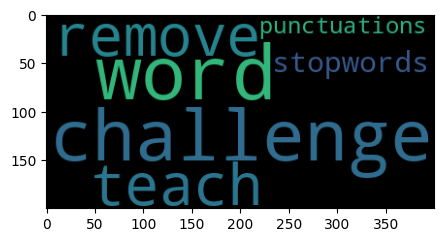

In [60]:
plt.figure(figsize=(5,5))
plt.imshow(WordCloud().generate(challenge_sentences_as_one_string))

# <ins>**UNDERSTAND HOW TO PERFORM COUNT VECTORIZATION (TOKENIZATION)**

![alt text](https://drive.google.com/uc?id=1eQi-Gq66e-sNw1ZvGs-zkJg95mCYdFoJ)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
sample_data = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
    ]

In [63]:
vectorizer = CountVectorizer()

In [64]:
X = vectorizer.fit_transform(sample_data)

In [65]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [66]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [67]:
test_challenge = ['Hello World',
                  'Hello Hello World',
                  'Hello World world world']

In [68]:
vectorizer_test_challenge = CountVectorizer()

In [69]:
X_challenge = vectorizer_test_challenge.fit_transform(test_challenge)

In [70]:
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


# <ins>**PERFORM DATA CLEANING BY APPLYING EVERYTHING WE LEARNED SO FAR!**

## **For creating pipeline to clean up data**
+ The pipeline performs the following:
  1. Remove punctuation
  2. Remove stopwords

In [71]:
# For defining a pipeline to clean up all the messages

def message_cleaning(message):
    Test_punc_removed = [char for char in str(message) if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    #Test_punc_removed_join = ''.join(map(str,Test_punc_removed))
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

**For using the pipeline to clean up our review data**

In [72]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [73]:
print(reviews_df_clean[3]) # show the cleaned up version for review number 3

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [74]:
print(reviews_df['verified_reviews'][3]) # show the original version

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [75]:
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [76]:
# For using sklearn to get again
# from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)

In [77]:
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'].fillna('')) # for getting the verified_reviews

In [78]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [79]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [80]:
reviews_countvectorizer.shape

(3150, 5211)

In [81]:
# Original reviews_df
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,"Listening to music, searching locations, check...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,"I do love these things, i have them running my...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,Only complaint I have is that the sound qualit...,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [82]:
# For droping the column verified_reviews
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [83]:
# For concatenating them together
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [84]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,1,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,1,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3148,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Let's drop the target label coloumns
X = reviews_df.drop(['feedback'],axis=1)

In [86]:
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,False,False,False,False,False,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3148,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [87]:
y = reviews_df['feedback']

# <ins>**UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES**

![alt text](https://drive.google.com/uc?id=1Xox54bvjhGOhrG-fSxEUIEgw1R3g-RIt)

![alt text](https://drive.google.com/uc?id=18Z4ug4UuyQG79lyPKs1zQwtrP_S4_yoU)

![alt text](https://drive.google.com/uc?id=1sVLtg8GaE3ZhNEZX1WJbxs7KAQyQ5dpX)

![alt text](https://drive.google.com/uc?id=1NT6Fm-lWUWNsu9i8uzVS4Q5pcm5gp8RK)

![alt text](https://drive.google.com/uc?id=1C32q5Uguymr9012x1lzRD5btnvJ-kW9r)

![alt text](https://drive.google.com/uc?id=1g5aXo5E-RIjRBy6-LLLA8gjG2j9dIL5X)

![alt text](https://drive.google.com/uc?id=106OXP_z89Hqh1JYVaROIbst0N0CgFRuT)

![alt text](https://drive.google.com/uc?id=1AXTHZ9KVUsJjMm9Whc4Adi5T4OznsSYn)

# <ins>**TRAIN A NAIVE BAYES CLASSIFIER MODEL**

In [88]:
X.shape

(3150, 5226)

In [89]:
y.shape

(3150,)

## <ins>**For training the model**

## For import model from sklearn

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X.columns = X.columns.astype(str)  # for converting to string

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## For importing naive from sklearn

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
NB_classifier = MultinomialNB()

In [95]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# <ins>**ASSESS TRAINED MODEL PERFORMANCE**  

![alt text](https://drive.google.com/uc?id=14_ft6Wiu-VaiU_5Ew2nS7EGGr3oLLQf8)

**For importing classification_report and confusion_matrix from <ins>sklearn.metrics**

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

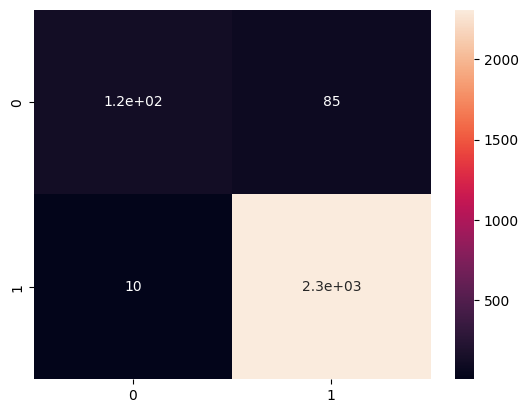

In [97]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

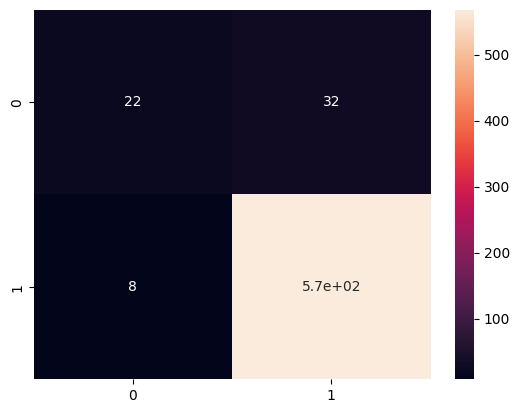

In [98]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [99]:
y_predict_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [100]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.73      0.41      0.52        54
           1       0.95      0.99      0.97       576

    accuracy                           0.94       630
   macro avg       0.84      0.70      0.74       630
weighted avg       0.93      0.94      0.93       630



# <ins>**TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER**

**For Importing linear model (logistic regression) from sklearn** and accuracy_score from sklearn metrics

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [102]:
model = LogisticRegression()

In [103]:
model.fit(X_train, y_train)

LogisticRegression()

In [104]:
y_pred = model.predict(X_test)

In [105]:
# Testing Set Performance
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [106]:
y_test

2300    1
2599    1
2531    1
650     1
138     1
       ..
1492    0
2306    1
1694    1
2614    1
2386    1
Name: feedback, Length: 630, dtype: int64

In [107]:
print('Accuracy {} %'.format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 93.80952380952381 %


<Axes: >

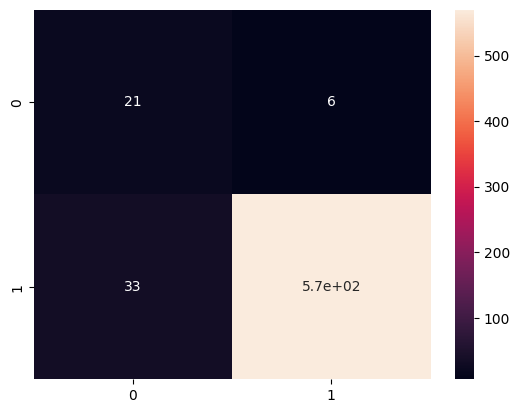

In [108]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.39      0.52        54
           1       0.95      0.99      0.97       576

    accuracy                           0.94       630
   macro avg       0.86      0.69      0.74       630
weighted avg       0.93      0.94      0.93       630

